In [23]:
import rpyc
import matplotlib.pyplot as plt

In [24]:
conn = rpyc.classic.connect(host='172.17.11.98', port=80) # host name or IP address of the EV3

In [62]:
robot = conn.modules.sys
robot.stdout.write("hello world")

11

In [37]:
conn.execute('''import ev3dev2
from ev3dev2.motor import LargeMotor, MoveSteering, MoveTank, OUTPUT_B, OUTPUT_C
from ev3dev2.sensor.lego import UltrasonicSensor, ColorSensor
from ev3dev2.sensor import INPUT_4, INPUT_1, INPUT_2
from ev3dev2.sound import Sound
from time import sleep


# Some basic functions

def move_forward_cm(cm, speed):
    
    degrees_to_run = cm / 17.5 * 360
    steer_pair = MoveSteering(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
    steer_pair.on_for_degrees(steering=0, speed=speed, degrees=degrees_to_run)
    
def spin_left_degrees(deg, speed):

    degrees_to_turn = deg * 197.5/90
    steer_pair = MoveSteering(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
    steer_pair.on_for_degrees(steering=-100, speed=speed, degrees=degrees_to_turn)

def spin_right_degrees(deg, speed):

    degrees_to_turn = deg * 197.5/90
    steer_pair = MoveSteering(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
    steer_pair.on_for_degrees(steering=+100, speed=speed, degrees=degrees_to_turn)
    
def turn_right_degrees(deg, speed):

    degrees_to_turn = deg * 403/90
    steer_pair = MoveTank(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
    steer_pair.on_for_degrees(speed, 0, degrees_to_turn)
    
def turn_left_degrees(deg, speed):

    degrees_to_turn = deg * 403/90
    steer_pair = MoveTank(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
    steer_pair.on_for_degrees(0, speed, degrees_to_turn)
    
def turn_left_rotations(rot, speed):
    steer_pair = MoveTank(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
    steer_pair.on_for_rotations(0, speed, rot)

def turn_right_rotations(rot, speed):
    steer_pair = MoveTank(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
    steer_pair.on_for_rotations(speed, 0, rot)

def give_command(name, arg):
    if (name == "turn_left_rotations"):
        turn_left_rotations(arg[0], arg[1])
    elif (name == "turn_right_rotations"):
        turn_right_rotations(arg[0], arg[1])
    elif (name =="turn_left_degrees"):
        turn_left_degrees(arg[0], arg[1])
    elif (name =="turn_right_degrees"):
        turn_right_degrees(arg[0], arg[1])
    elif (name =="spin_right_degrees"):
        spin_right_degrees(arg[0], arg[1])
    elif (name =="spin_left_degrees"):
        spin_left_degrees(arg[0], arg[1])
    elif (name =="move_forward_cm"):
        movee_forward
''')
print("complete")

complete


In [4]:
conn.execute('''sound = Sound()
sound.speak('GFenix rises again')''')

In [ ]:
conn.execute('''
steer_pair = MoveSteering(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)

steer_pair.on_for_degrees(steering=-100, speed=10, degrees=197)''')


In [26]:
conn.execute('''
def getDistanceAhead():
    ultrasound = UltrasonicSensor(INPUT_2)
    return ultrasound.distance_centimeters''')

In [ ]:
conn.execute('''
lightsensor = ColorSensor(INPUT_1)
for x in range(1,30):
    print(lightsensor.reflected_light_intensity)
    sleep(1)''')

In [ ]:
conn.execute('''tank_drive = MoveTank(OUTPUT_B, OUTPUT_C)
# drive in a turn for 10 rotations of the outer motor
tank_drive.on_for_degrees(-10, 0, 403)''')

In [ ]:
conn.execute('''turn_left_degrees(90,10)
turn_right_degrees(90,-10)
''')

In [79]:
conn.execute('''
def scan_mode():
    scanResults = []
    for x in range(0,90):
        spin_left_degrees(2,6)
        scanResults.append(((x+1) * 2, getDistanceAhead()))
    return scanResults''')

In [80]:
x = conn.execute('''scanResults = scan_mode()''')

In [27]:
# Pipe the output to jupyter

import sys
conn.modules.sys.stdout = sys.stdout

In [ ]:
conn.execute('''hunting_mode = False''')
print(conn.namespace["hunting_mode"])

In [39]:
conn.execute('''
scan_number = 0
scanResults = {}
degrees = 90
direction = "port"
scanResults[scan_number] = []
limit = 25

while(limit > 0):
    limit -= 1
    if (direction == "port"):
        turn_right_rotations(5/360,1)
        degrees += 5
    else:
        turn_right_rotations(5/360,-1)
        degrees -= 5
        
    if (degrees == 45):
        direction = "starboard"
    elif (degrees == 135):
        direction = "port"
    
    if (degrees == 90) & (direction == "port"):
        scan_number += 1
        scanResults[scan_number] = []
        
    scanResults[scan_number].append((degrees, getDistanceAhead()))
''')

In [33]:
print(conn.namespace["scanResults"])

{0: [(88, 150.5), (86, 149.8), (84, 150.4), (82, 151.70000000000002), (80, 151.70000000000002), (78, 151.70000000000002), (76, 151.3), (74, 151.3), (72, 152.0), (70, 152.0), (68, 153.4), (66, 152.0), (64, 153.3), (62, 152.8), (60, 154.3), (58, 153.9), (56, 255.0), (54, 255.0), (52, 255.0), (50, 255.0), (48, 255.0), (46, 255.0), (44, 255.0), (42, 255.0), (40, 255.0), (38, 255.0), (36, 255.0), (34, 255.0), (32, 255.0), (30, 255.0), (28, 255.0), (26, 255.0), (24, 255.0), (22, 255.0), (20, 255.0), (18, 255.0), (16, 255.0), (14, 255.0), (12, 51.1), (10, 48.300000000000004), (8, 32.1), (6, 25.900000000000002), (4, 29.8), (2, 32.1), (0, 28.200000000000003), (2, 32.1), (4, 34.800000000000004), (6, 32.1), (8, 32.6), (10, 32.1), (12, 152.0), (14, 152.5), (16, 33.4), (18, 33.4), (20, 150.5), (22, 149.9), (24, 149.0), (26, 149.0), (28, 149.0), (30, 149.0), (32, 149.0), (34, 149.0), (36, 149.1), (38, 149.1), (40, 149.1), (42, 149.1), (44, 149.1), (46, 149.0), (48, 149.0), (50, 149.0), (52, 149.0), 

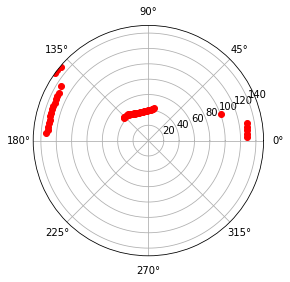

In [83]:


fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax.set_ylim(0,150)
for x, y in conn.namespace["scanResults"]:
    plt.polar(x* 0.0174533, y, 'ro')
    #ax.plot(x,y,lw=1.5)
plt.show()

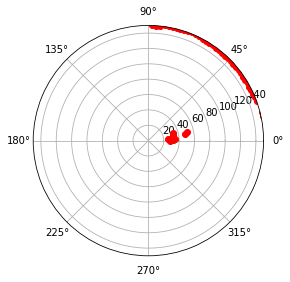

In [34]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax.set_ylim(0,150)
for x, y in conn.namespace["scanResults"][0]:
    plt.polar(x* 0.0174533, y, 'ro')
    #ax.plot(x,y,lw=1.5)
plt.show()

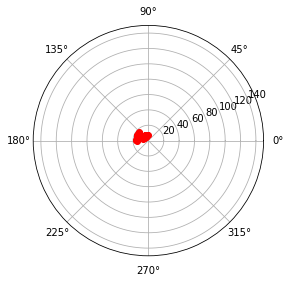

In [35]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax.set_ylim(0,150)
for x, y in conn.namespace["scanResults"][1]:
    plt.polar(x* 0.0174533, y, 'ro')
    #ax.plot(x,y,lw=1.5)
plt.show()